In [1]:
from matplotlib import pyplot as plt
import numpy as np
import json

In [2]:
with open('./result.json', 'r') as f:
    results = json.load(f)
with open('./result_spectral.json', 'r') as f:
    results_spectral = json.load(f)
with open('./result_mu.json', 'r') as f:
    results_mu = json.load(f)

In [3]:
sizes = np.array(results['sizes'])
epsilons = np.array(results['epsilon_threshold'])/2
mu = np.array(results_mu['norm_mu'])
thetas = np.array(results['thetas'])
ks = np.array(results['ks'])
ps = np.array([np.sqrt(1/0.85) for _ in range(100)])

In [4]:
runtime = (mu*ks*4096)/(thetas*epsilons*ps*pow(0.1,2))
#list(runtime)

In [5]:
runtime2 = (mu)/(epsilons*ps)
#list(runtime2)

In [6]:
runtime3 = (mu*ks)/(thetas*epsilons*ps)
#list(runtime3) use these results to produce the run-times plot.

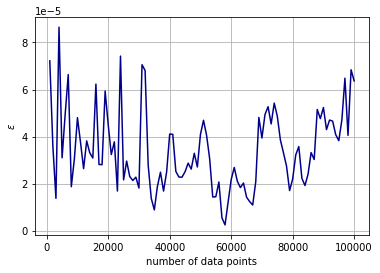

In [7]:
#### Distribution of threshold epsilons
plt.plot(sizes, epsilons, color="darkblue")
plt.grid()
plt.xlabel("number of data points")
plt.ylabel(r"$\epsilon$")
plt.savefig('epsilons.pdf', bbox_inches='tight')

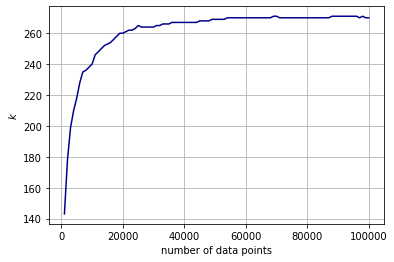

In [8]:
#### Distribution of ks
plt.plot(sizes, ks, color="darkblue")
plt.grid()
plt.xlabel("number of data points")
plt.ylabel(r"$k$")
plt.savefig('ks.pdf', bbox_inches='tight')

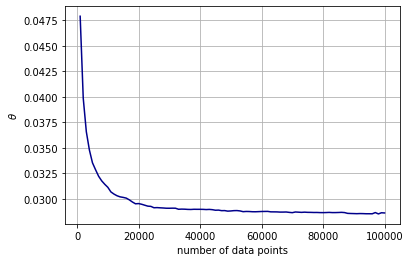

In [9]:
#### Distribution of thetas
plt.plot(sizes, thetas, color="darkblue")
plt.grid()
plt.xlabel("number of data points")
plt.ylabel(r"$\theta$")
plt.savefig('thetas.pdf', bbox_inches='tight')

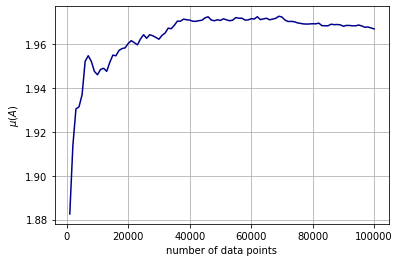

In [10]:
#### Distribution of mus
plt.plot(sizes, mu, color="darkblue")
plt.grid()
plt.xlabel("number of data points")
plt.ylabel(r"$\mu(A)$")
plt.savefig('mu.pdf', bbox_inches='tight')

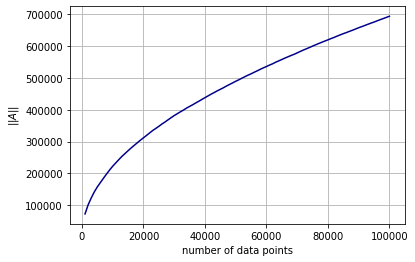

In [11]:
specnorms = results_spectral['spectral_norms']
#### Distribution of spectral norms
plt.plot(sizes, specnorms, color="darkblue")
plt.grid()
plt.xlabel("number of data points")
plt.ylabel(r"$||A||$")
plt.savefig('specnorms.pdf', bbox_inches='tight')

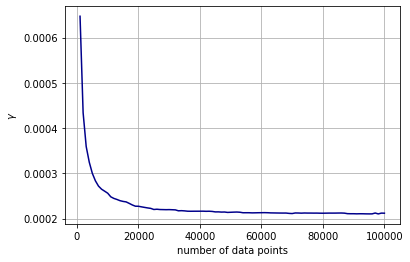

In [12]:
gammas = np.power(thetas,2)/np.power(mu,2)
#### Distribution of spectral norms
plt.clf()
plt.plot(sizes, gammas, color="darkblue")
plt.grid()
plt.xlabel("number of data points")
plt.ylabel(r"$\gamma$")
plt.savefig('gammas.pdf', bbox_inches='tight')

In [13]:
data = np.load('./tiny_imagenet_bw.npy')
X_mean0 = np.array(data - np.mean(data, axis = 0))

U, E, V = np.linalg.svd(X_mean0, full_matrices=False)
E2 = np.array([pow(e,2) for e in E]) # Computing the powers of 2
E3 = E2/np.sum(E2) # Computing the Factor score ratios

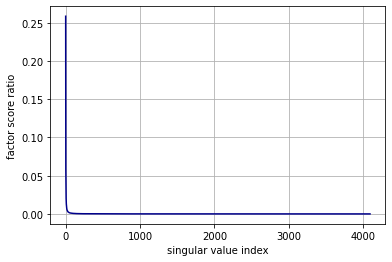

In [14]:
#### Distribution of the factor score ratios
plt.plot(E3, color="darkblue")
plt.grid()
plt.xlabel("singular value index")
plt.ylabel("factor score ratio")
plt.savefig('TinyImagenet_sv_distribution.pdf', bbox_inches='tight')

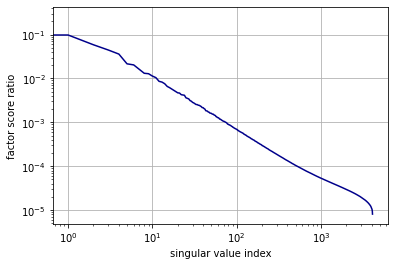

In [15]:
#### Distribution of the factor score ratios
plt.plot(E3, color="darkblue")
plt.grid()
plt.xlabel("singular value index")
plt.ylabel("factor score ratio")
plt.xscale("log")
plt.yscale("log")
plt.savefig('TinyImagenet_sv_distribution_log.pdf', bbox_inches='tight')